## Geometric Computer Vision, Skoltech, 2021 

**Alexey Artemov, Sofia Potapova**

## Task

1) **(5 points)** Train MeshCNN on SCHREC16 to achieve at least 70% accuracy

2) **(2 points)** Visualize mesh collapses, save as screenshots

You should get something like this:

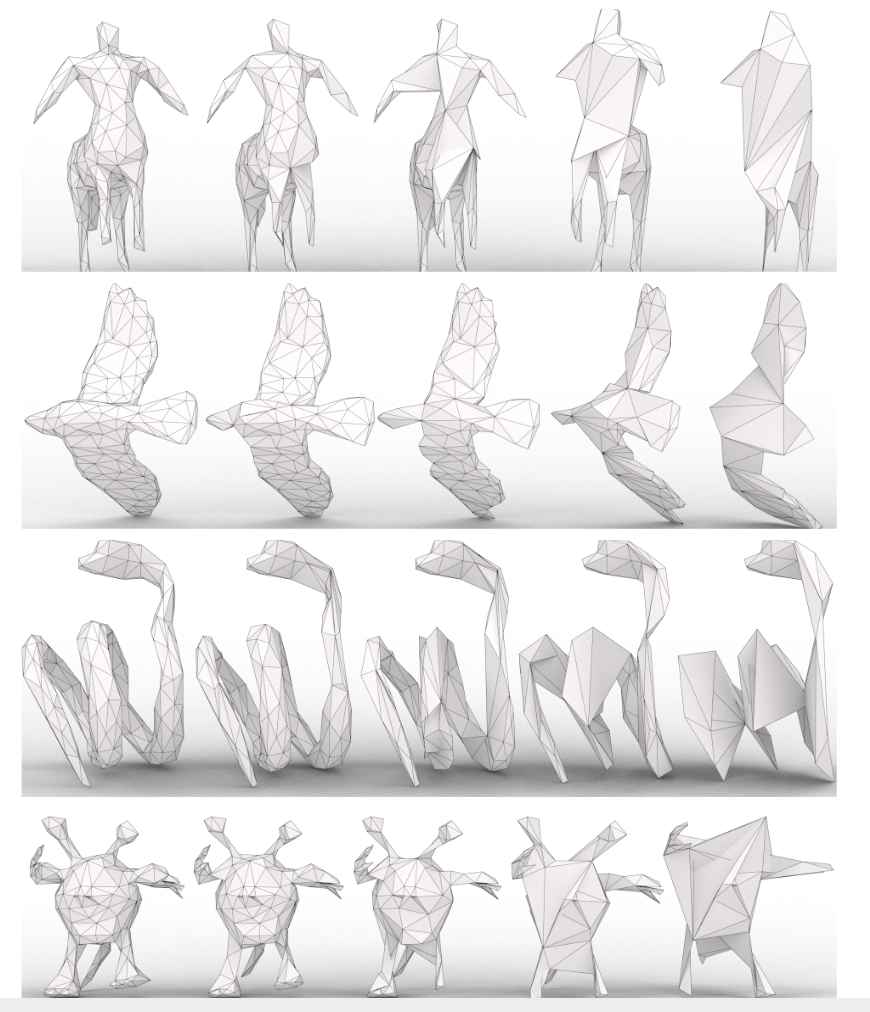

In [ ]:
import os
import numpy as np
import trimesh

import torch
import torch.nn as nn
import torch.nn.functional as F

from dataset_utils import DataLoader


gpu_ids = []

if len(gpu_ids) > 0:
    torch.cuda.set_device(gpu_ids[0])

device = torch.device('cuda:{}'.format(gpu_ids[0])) if gpu_ids else torch.device('cpu')
device

In [ ]:
# !wget https://www.dropbox.com/s/w16st84r6wc57u7/shrec_16.tar.gz

In [ ]:
# !tar -xzvf shrec_16.tar.gz && rm shrec_16.tar.gz

In [ ]:
dataroot = 'shrec_16' # path to meshes (should have subfolders train, test)

export_folder = './collapses' # exports intermediate collapses to this folder
if not os.path.exists(export_folder):
    os.makedirs(export_folder)


batch_size = 16

test_dataset = DataLoader(dataroot,
                          export_folder,
                          device=device,
                          batch_size=batch_size,
                          phase='test',
                          num_aug=1)


train_dataset = DataLoader(dataroot,
                           export_folder,
                           device=device,
                           batch_size=batch_size,
                           phase='train',
                           num_aug=20)

print(len(test_dataset), len(train_dataset))

In [ ]:
from net_utils import init_weights

input_nc = train_dataset.dataset.ninput_channels
nclasses = train_dataset.dataset.nclasses


net = MeshCNN(input_nc, nclasses)

if len(gpu_ids) > 0:
    assert(torch.cuda.is_available())
    net.cuda(gpu_ids[0])
    net = net.cuda()
    net = torch.nn.DataParallel(net, gpu_ids)
    
    
init_weights(net, init_type='normal', init_gain=0.02)

In [ ]:
## for better augmentation 
## you can play with parameters
## do_scale_verts, flip_edges_prct, slide_verts_prct


optimizer = ## Your favourite optimizer
criterion = ## Loss for classification task
criterion = criterion.to(device)

In [ ]:
net.train()

for epoch in range(100):
    ### Your training code here ###
    
    acc = test(net, test_dataset)
    print('epoch: {}, TEST ACC: [{:.5} %]\n'.format(epoch, acc * 100))